In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [173]:
df = pd.read_csv('review_shopping.csv',sep='\t', names=['text','sentiment'], header=None)
df

,text,sentiment
0,เกลียด ชอบหลอกให้สั่งซื้อ ที่ไหนได้ไม่มีสิ้นค้า,neg
1,สินค้าด้อยคุณภาพ,neg
2,สินค้าหมดทำไมไม่แจ้งขึ้นว่าหมดอะ.กดใส่ตะกร้าไป...,neg
3,อย่าทำแบบนี้กับใครอีกนะค่ะแย่มากค่ะ,neg
4,คือเเบบผิดหวังมาก เเย่ที่สุดได้ของมาฝาเเตก เเต...,neg
...,...,...
123,สินค้ามีตำหนิ แย่มากๆ ไม่ไหวๆเลย ถ้ามีตำหนิก็บ...,neg
124,เปราะบางมากความแข็งแรงน้อย มันง่ายต่อการแตกหัก,neg
125,ขนส่งก็ช้าสินค้ามีตำหนิแพ็คสินค้าไม่ดีมีรอยบุบ,neg
126,สินค้าเหมือนของปลอม เนื่อครีมเหมือนซอง 10 บาท ...,neg


<AxesSubplot: >

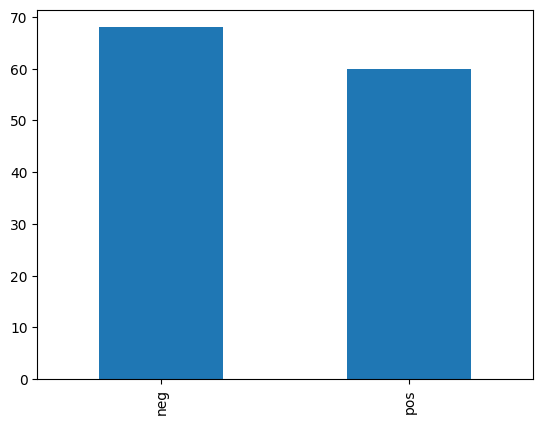

In [174]:
df['sentiment'].value_counts().plot.bar()

In [175]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())
thai_stopwords

['ละ',
 'ยาก',
 'สืบเนื่อง',
 'ก่อนหน้านี้',
 'หารือ',
 'พวกโน้น',
 'นับแต่นี้',
 'ด้วย',
 'ส่วนด้อย',
 'นานๆ',
 'ล้วน',
 'คราวไหน',
 'แต่ที่',
 'เกินๆ',
 'พวกคุณ',
 'เป็นๆ',
 'ตลอดทั้ง',
 'พร้อม',
 'สมัยนี้',
 'จนบัดนี้',
 'สิ่งไหน',
 'แต่ต้อง',
 'เพิ่ง',
 'ใหม่',
 'เต็มไปหมด',
 'ทุก',
 'มากมาย',
 'เช่นนั้น',
 'ภายใน',
 'กันดีไหม',
 'ที่ได้',
 'แต่ว่า',
 'ดั่งกับ',
 'อาจเป็น',
 'แต่เมื่อ',
 'คุณๆ',
 'คง',
 'สูงสุด',
 'เคยๆ',
 'ผิดๆ',
 'มิได้',
 'ครั้งๆ',
 'นาน',
 'นี้เอง',
 'แล้วแต่',
 'ส่วนน้อย',
 'ภายภาค',
 'อย่างโน้น',
 'ด้วยเหตุว่า',
 'ด้วยเหตุนั้น',
 'คราว',
 'น่า',
 'ทาง',
 'รวม',
 'ปรับ',
 'เป็นเพราะว่า',
 'ช่วง',
 'ยังแต่',
 'นาย',
 'ตลอดถึง',
 'เช่นกัน',
 'นับแต่นั้น',
 'เป็นอันมาก',
 'แห่งไหน',
 'อาจเป็นด้วย',
 'ก่อนหน้า',
 'ให้',
 'นอกเหนือจาก',
 'เถิด',
 'ส่วนดี',
 'ครั้งหลังสุด',
 'สู่',
 'แห่ง',
 'ยอมรับ',
 'นอก',
 'บอกแล้ว',
 'ถึงเมื่อใด',
 'ภาย',
 'คงอยู่',
 'ตลอดเวลา',
 'รึ',
 'การ',
 'และ',
 'ปรากฏว่า',
 'ในเมื่อ',
 'ที่แห่งนั้น',
 'ด้วยเหตุเพราะ',
 'นางสาว',
 'ถึงแม

In [176]:
from pythainlp import word_tokenize

def text_process(text) :
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!", '"', "ๆ", "ฯ"))
    final = word_tokenize(final)
    final = " ".join(word for word in final)
    final = " ".join(word for word in final.split() if word.lower not in thai_stopwords)
    return final

df['text_tokens'] = df['text'].apply(text_process)
df['text_tokens']

0      เกลียด ชอบ หลอก ให้ สั่งซื้อ ที่ไหนได้ ไม่ มี ...
1                                     สินค้า ด้อย คุณภาพ
2      สินค้า หมด ทำไม ไม่ แจ้ง ขึ้น ว่า หมด อะ กด ใส...
3           อย่า ทำ แบบนี้ กับ ใคร อีก นะ ค่ะ แย่มาก ค่ะ
4      คือ เเบบ ผิดหวัง มาก เเย่ ที่สุด ได้ ของ มา ฝา...
                             ...                        
123    สินค้า มีตำหนิ แย่มาก ไม่ ไหว เลย ถ้า มีตำหนิ ...
124    เปราะบาง มาก ความแข็งแรง น้อย มัน ง่าย ต่อ การ...
125    ขนส่ง ก็ ช้า สินค้า มีตำหนิ แพ็ค สินค้า ไม่ ดี...
126    สินค้า เหมือน ของปลอม เนื่อ ครีม เหมือน ซอง 10...
127                 รายการ ไม่ ดี ที่จับ ไม่ ดี และ สั้น
Name: text_tokens, Length: 128, dtype: object

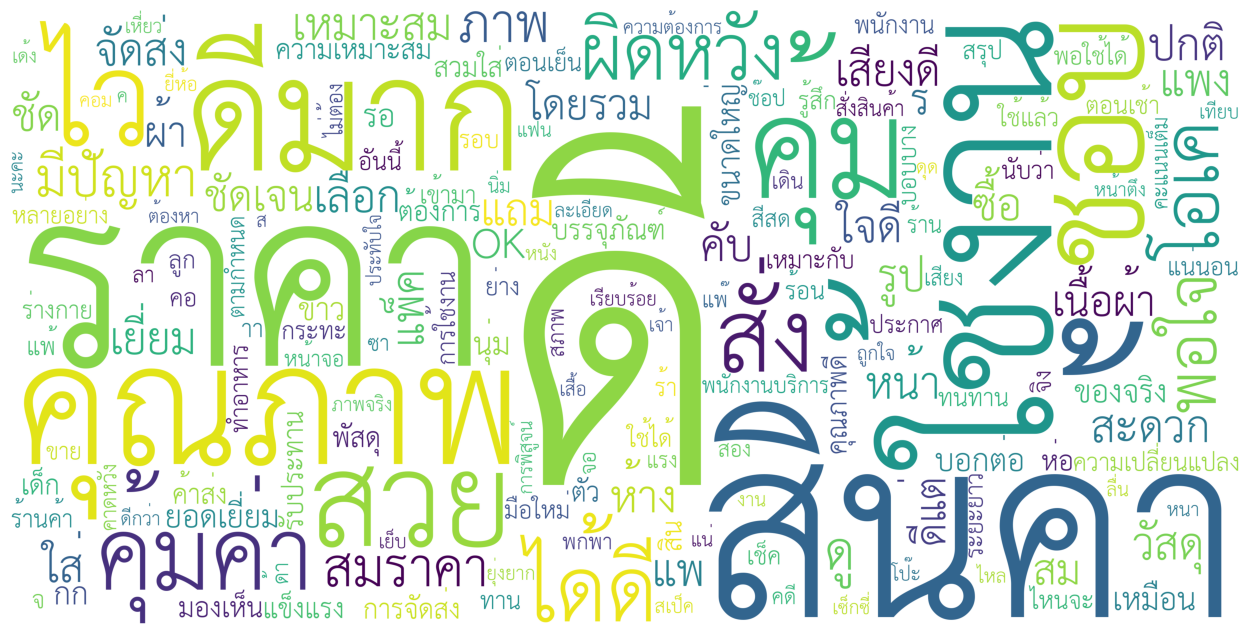

In [177]:
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['sentiment'] == 'pos']
pos_word_all = " ".join(text for text in df_pos['text_tokens'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'THSarabunNew.ttf'
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


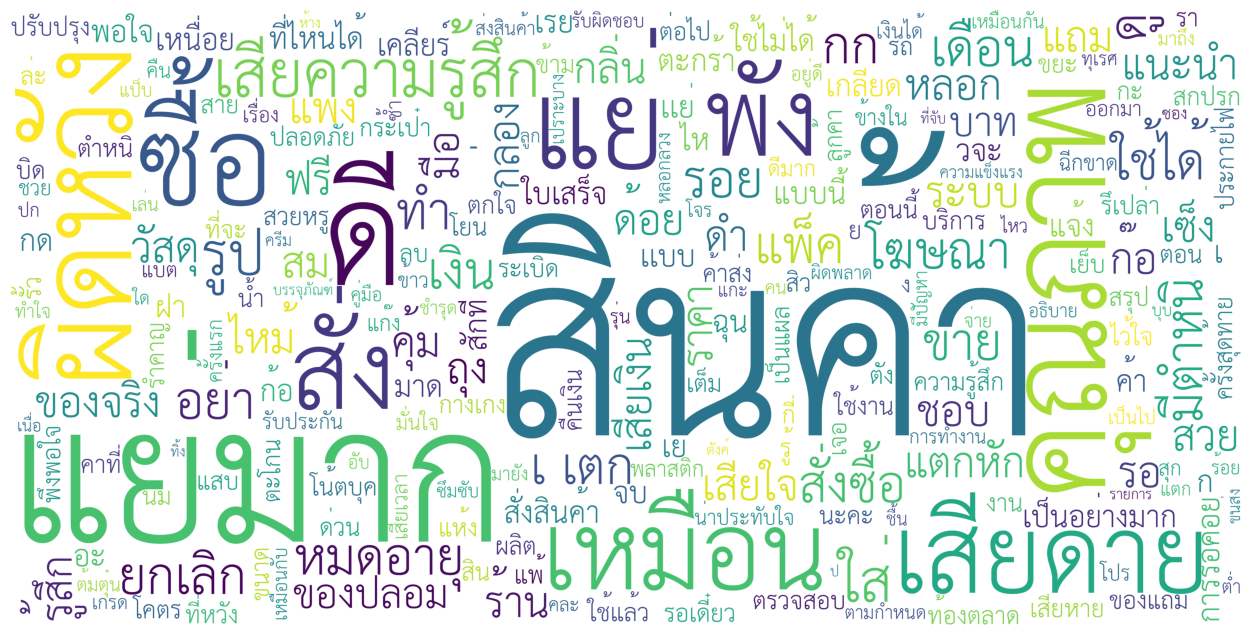

In [178]:
df_neg = df[df['sentiment'] == 'neg']
neg_word_all = " ".join(text for text in df_neg['text_tokens'])
wordcloud = WordCloud(stopwords=thai_stopwords, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(neg_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [179]:
from sklearn.model_selection import train_test_split
X = df['text_tokens']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [185]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
steps = [
    ('cvec' , CountVectorizer(analyzer=lambda x:x.split(' '))),
    ('leg' , LogisticRegression())
]
pipe = Pipeline(steps)
pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(analyzer=<function <lambda> at 0x0000018428D1B130>)),
                ('leg', LogisticRegression())])

In [187]:
from sklearn.metrics import confusion_matrix,classification_report
test_predictions = pipe.predict(X_test)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

         neg       0.92      0.96      0.94        23
         pos       0.93      0.88      0.90        16

    accuracy                           0.92        39
   macro avg       0.93      0.92      0.92        39
weighted avg       0.92      0.92      0.92        39



In [188]:
my_text = 'ตรงปกส่งไวครับ'
my_tokens = text_process(my_text)
my_predictions = pipe.predict(pd.Series([my_tokens]))
my_predictions

array(['pos'], dtype=object)

In [189]:
my_text = 'ไม่ตรงปกส่งช้าครับ'
my_tokens = text_process(my_text)
my_predictions = pipe.predict(pd.Series([my_tokens]))
my_predictions

array(['neg'], dtype=object)